How good was the prediction (Did their predictions come true, vs what actually happened)

In [ ]:
import pandas as pd

file_path_a = '/OECD Israel Actual.csv'
df_actual = pd.read_csv(file_path_a)
file_path_p = '/OECD Israel Prediction.csv'
df_predicted = pd.read_csv(file_path_p)

print (df_actual.head())
print (df_predicted.head())

columns_a = list(df_actual.columns.values)
print(columns_a)
columns_p = list(df_predicted.columns.values)
print(columns_p)


  STRUCTURE                                    STRUCTURE_ID  \
0  DATAFLOW  OECD.TAD.ATM:DSD_AGR@DF_OUTLOOK_2023_2032(1.0)   
1  DATAFLOW  OECD.TAD.ATM:DSD_AGR@DF_OUTLOOK_2023_2032(1.0)   
2  DATAFLOW  OECD.TAD.ATM:DSD_AGR@DF_OUTLOOK_2023_2032(1.0)   
3  DATAFLOW  OECD.TAD.ATM:DSD_AGR@DF_OUTLOOK_2023_2032(1.0)   
4  DATAFLOW  OECD.TAD.ATM:DSD_AGR@DF_OUTLOOK_2023_2032(1.0)   

                            STRUCTURE_NAME ACTION REF_AREA Reference area  \
0  OECD-FAO Agricultural Outlook 2023-2032      I      ISR         Israel   
1  OECD-FAO Agricultural Outlook 2023-2032      I      ISR         Israel   
2  OECD-FAO Agricultural Outlook 2023-2032      I      ISR         Israel   
3  OECD-FAO Agricultural Outlook 2023-2032      I      ISR         Israel   
4  OECD-FAO Agricultural Outlook 2023-2032      I      ISR         Israel   

  FREQ Frequency of observation COMMODITY   Commodity  ... OBS_VALUE  \
0    A                   Annual  CPC_0143  Cottonseed  ...      8.46   
1    A        

                             STRUCTURE_NAME REF_AREA  Measure  OBS_VALUE  \
23  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports        0.0   
24  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports        0.0   
25  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports        0.0   
26  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports        0.0   
27  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports        0.0   

   Unit of measure  TIME_PERIOD  
23          Tonnes         2019  
24          Tonnes         2020  
25          Tonnes         2021  
26          Tonnes         2022  
27          Tonnes         2023  
                             STRUCTURE_NAME REF_AREA     Measure  OBS_VALUE  \
63  OECD-FAO Agricultural Outlook 2021-2030      ISR  Production    75.0000   
64  OECD-FAO Agricultural Outlook 2021-2030      ISR  Production    85.0000   
65  OECD-FAO Agricultural Outlook 2021-2030      ISR  Production    78.1262   
66  OECD-FAO Agricultur

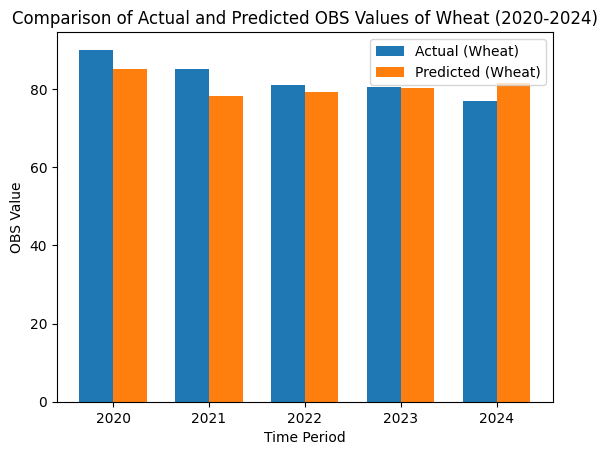

                            STRUCTURE_NAME REF_AREA  Measure  OBS_VALUE  \
1  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports       8.90   
2  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports       8.20   
3  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports       7.54   
4  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports       7.54   
5  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports       6.21   

  Unit of measure  TIME_PERIOD  
1          Tonnes         2019  
2          Tonnes         2020  
3          Tonnes         2021  
4          Tonnes         2022  
5          Tonnes         2023  
                            STRUCTURE_NAME REF_AREA     Measure  OBS_VALUE  \
0  OECD-FAO Agricultural Outlook 2021-2030      ISR  Production     8.2000   
1  OECD-FAO Agricultural Outlook 2021-2030      ISR  Production     7.5000   
2  OECD-FAO Agricultural Outlook 2021-2030      ISR  Production     7.6099   
3  OECD-FAO Agricultural Outlook 2021-2

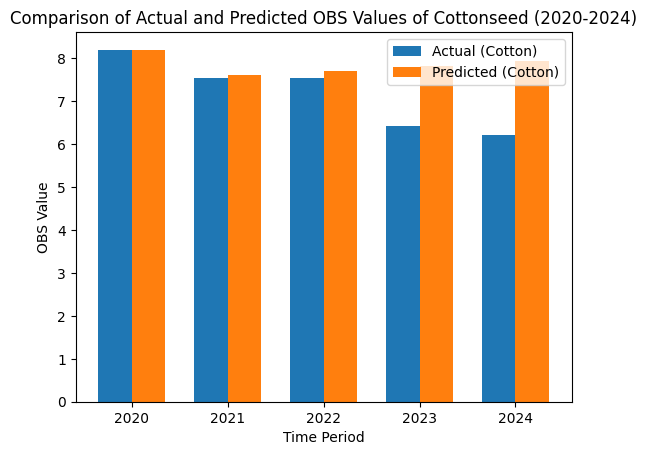

                             STRUCTURE_NAME REF_AREA  Measure  OBS_VALUE  \
70  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports      50.50   
71  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports      50.45   
72  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports      50.40   
73  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports      50.34   
74  OECD-FAO Agricultural Outlook 2023-2032      ISR  Exports      51.02   

   Unit of measure  TIME_PERIOD  
70          Tonnes         2019  
71          Tonnes         2020  
72          Tonnes         2021  
73          Tonnes         2022  
74          Tonnes         2023  
                             STRUCTURE_NAME REF_AREA         Measure  \
21  OECD-FAO Agricultural Outlook 2021-2030      ISR  Area harvested   
22  OECD-FAO Agricultural Outlook 2021-2030      ISR  Area harvested   
23  OECD-FAO Agricultural Outlook 2021-2030      ISR  Area harvested   
24  OECD-FAO Agricultural Outlook 2021-2030      IS

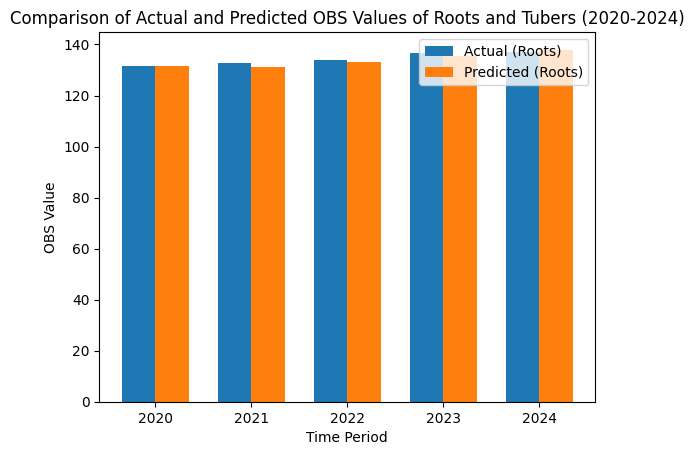

In [ ]:
#clean and filter only relevant columns
from sklearn import preprocessing
import numpy as np

df_filtered_actual = df_actual[(df_actual['STRUCTURE_NAME'].notna()) &
                               (df_actual['REF_AREA'].notna()) &
                               (df_actual['Commodity'].notna()) &
                               (df_actual['Measure'].notna()) &
                               (df_actual['OBS_VALUE'].notna()) &
                               (df_actual['Unit of measure'].notna()) &
                               (df_actual['TIME_PERIOD'] >= 2019) &
                                (df_actual['TIME_PERIOD'] < 2031)]

df_filtered_predicted = df_predicted[(df_predicted['STRUCTURE_NAME'].notna()) &
                                     (df_predicted['REF_AREA'].notna()) &
                                     (df_predicted['Commodity'].notna()) &
                                     (df_predicted['Measure'].notna()) &
                                     (df_predicted['OBS_VALUE'].notna()) &
                                     (df_predicted['Unit of measure'].notna()) &
                                     (df_predicted['TIME_PERIOD'] >= 2019) &
                                      (df_predicted['TIME_PERIOD'] < 2031)]

relevant_columns = ['STRUCTURE_NAME', 'REF_AREA', 'Measure', 'OBS_VALUE', 'Unit of measure', 'TIME_PERIOD']

#wheat
df_filtered_actual_subset_wheat = df_filtered_actual[df_filtered_actual['Commodity'] == 'Wheat'][relevant_columns]
df_filtered_predicted_subset_wheat = df_filtered_predicted[df_filtered_predicted['Commodity'] == 'Wheat'][relevant_columns]

print(df_filtered_actual_subset_wheat.head())
print(df_filtered_predicted_subset_wheat.head())



##run test
from sklearn.metrics import mean_squared_error
import math

df_actual_subset_wheat_20_24 = df_filtered_actual_subset_wheat[(df_filtered_actual_subset_wheat['TIME_PERIOD'] >= 2020) & (df_filtered_actual_subset_wheat['TIME_PERIOD'] <= 2024)]
df_predicted_subset_wheat_20_24 = df_filtered_predicted_subset_wheat[(df_filtered_predicted_subset_wheat['TIME_PERIOD'] >= 2020) & (df_filtered_predicted_subset_wheat['TIME_PERIOD'] <= 2024)]

group1_wheat = preprocessing.normalize(df_actual_subset_wheat_20_24['OBS_VALUE'].values.reshape(-1, 1))
group2_wheat = preprocessing.normalize(df_predicted_subset__wheat_20_24['OBS_VALUE'].values.reshape(-1, 1))
result_wheat = mean_squared_error(group1_wheat, group2_wheat)
print(f"Mean Squared Error: Wheat: {result_wheat}")
print(f"Mean Error: Wheat: {math.sqrt(result_wheat)}")

#bar graph
import matplotlib.pyplot as plt

bar_width = 0.35
plt.bar(df_actual_subset_wheat_20_24['TIME_PERIOD'] - bar_width/2, df_actual_subset_wheat_20_24['OBS_VALUE'], bar_width, label='Actual (Wheat)')
plt.bar(df_predicted_subset_wheat_20_24['TIME_PERIOD'] + bar_width/2, df_predicted_subset_wheat_20_24['OBS_VALUE'], bar_width, label='Predicted (Wheat)')

plt.xlabel('Time Period')
plt.ylabel('OBS Value')
plt.title('Comparison of Actual and Predicted OBS Values of Wheat (2020-2024)')

plt.legend()
plt.show()


#Cottonseed
df_filtered_actual_subset_cotton = df_filtered_actual[df_filtered_actual['Commodity'] == 'Cottonseed'][relevant_columns]
df_filtered_predicted_subset_cotton = df_filtered_predicted[df_filtered_predicted['Commodity'] == 'Cottonseed'][relevant_columns]

print(df_filtered_actual_subset_cotton.head())
print(df_filtered_predicted_subset_cotton.head())

##run test
df_actual_subset_cotton_20_24 = df_filtered_actual_subset_cotton[(df_filtered_actual_subset_cotton['TIME_PERIOD'] >= 2020) & (df_filtered_actual_subset_cotton['TIME_PERIOD'] <= 2024)]
df_predicted_subset_cotton_20_24 = df_filtered_predicted_subset_cotton[(df_filtered_predicted_subset_cotton['TIME_PERIOD'] >= 2020) & (df_filtered_predicted_subset_cotton['TIME_PERIOD'] <= 2024)]

group1_cotton = preprocessing.normalize(df_actual_subset_cotton_20_24['OBS_VALUE'].values.reshape(-1, 1))
group2_cotton = preprocessing.normalize(df_predicted_subset_cotton_20_24['OBS_VALUE'].values.reshape(-1, 1))
result_cotton = mean_squared_error(group1_cotton, group2_cotton)
print(f"Mean Squared Error: Cotton: {result_cotton}")
print(f"Mean Error: Cotton: {math.sqrt(result_cotton)}")

#bar graph
import matplotlib.pyplot as plt

bar_width = 0.35
plt.bar(df_actual_subset_cotton_20_24['TIME_PERIOD'] - bar_width/2, df_actual_subset_cotton_20_24['OBS_VALUE'], bar_width, label='Actual (Cotton)')
plt.bar(df_predicted_subset_cotton_20_24['TIME_PERIOD'] + bar_width/2, df_predicted_subset_cotton_20_24['OBS_VALUE'], bar_width, label='Predicted (Cotton)')

plt.xlabel('Time Period')
plt.ylabel('OBS Value')
plt.title('Comparison of Actual and Predicted OBS Values of Cottonseed (2020-2024)')

plt.legend()
plt.show()

#Roots and Tubers
df_filtered_actual_subset_roots = df_filtered_actual[df_filtered_actual['Commodity'] == 'Roots and tubers'][relevant_columns]
df_filtered_predicted_subset_roots = df_filtered_predicted[df_filtered_predicted['Commodity'] == 'Roots and tubers'][relevant_columns]

print(df_filtered_actual_subset_roots.head())
print(df_filtered_predicted_subset_roots.head())

##run test
df_actual_subset_roots_20_24 = df_filtered_actual_subset_roots[(df_filtered_actual_subset_roots['TIME_PERIOD'] >= 2020) & (df_filtered_actual_subset_roots['TIME_PERIOD'] <= 2024)]
df_predicted_subset_roots_20_24 = df_filtered_predicted_subset_roots[(df_filtered_predicted_subset_roots['TIME_PERIOD'] >= 2020) & (df_filtered_predicted_subset_roots['TIME_PERIOD'] <= 2024)]

group1_roots = preprocessing.normalize(df_actual_subset_roots_20_24['OBS_VALUE'].values.reshape(-1, 1))
group2_roots = preprocessing.normalize(df_predicted_subset_roots_20_24['OBS_VALUE'].values.reshape(-1, 1))
result_roots = mean_squared_error(group1_roots, group2_roots)
print(f"Mean Squared Error: Roots and Tubers: {result_roots}")
print(f"Mean Error: Roots and Tubers: {math.sqrt(result_roots)}")
#bar graph
import matplotlib.pyplot as plt

bar_width = 0.35
plt.bar(df_actual_subset_roots_20_24['TIME_PERIOD'] - bar_width/2, df_actual_subset_roots_20_24['OBS_VALUE'], bar_width, label='Actual (Roots)')
plt.bar(df_predicted_subset_roots_20_24['TIME_PERIOD'] + bar_width/2, df_predicted_subset_roots_20_24['OBS_VALUE'], bar_width, label='Predicted (Roots)')

plt.xlabel('Time Period')
plt.ylabel('OBS Value')
plt.title('Comparison of Actual and Predicted OBS Values of Roots and Tubers (2020-2024)')

plt.legend()
plt.show()
